# Produce the various exclusion plots

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import pickle
import gc

from exp_analysis_class import full_likelihood, compute_likelihood_from_retrieved
from dark_nus_utils import load_datasets
from const import alphaQED
from analyses_dict import analyses
from parameters_dict import *
from dark_nus_utils import retrieve_full_analysis

from likelihood_contours_plot import *

In [3]:
hierarchy = 'heavy'
D_or_M = 'dirac'

save_folder = f'../fig/6_limit_visualisation/'
!mkdir -p $save_folder

set_plot_style()

In [4]:
# my_exp_analyses = load_datasets(hierarchies=['heavy', 'light'],
#                                   D_or_Ms=D_or_M,
#                                   fluxes=['FHC', 'RHC'],
#                                 timeit=True, 
#                                 direct_load_objects=False,
#                                 load_grid=False,
#                                 dump=True,
#                                 nentries=1000000)

In [5]:
my_exp_analyses = load_datasets(
                                hierarchies=hierarchy, 
                                D_or_Ms=D_or_M, 
                                fluxes=['FHC', 'RHC'],
                                timeit=True, 
                                direct_load_objects=True,
                                load_grid=False,
                                dump=False,
                                nentries=1000000)

heavy dirac FHC
Wall time: 0.5955889225006104 s, CPU time: 0.5836328130000004
heavy dirac RHC
Wall time: 0.5728554725646973 s, CPU time: 0.5618542949999998


In [6]:
analysis_names = ['tpc_argon_only', 'tpc_pod_only', 'tpc', 'tpc_projection1', 'tpc_projection2']

# $m_{Z^\prime} - \varepsilon$

In [7]:
case_vars = ['mz', 'epsilon']
retrieved = retrieve_full_analysis(case_vars, hierarchy)
likes, mus, sigma2s = compute_likes(retrieved, 
                                    my_exp_analyses, 
                                    hierarchy,
                                    D_or_M,
                                    analysis_names)

tpc_argon_only FHC
tpc_argon_only RHC
tpc_pod_only FHC
tpc_pod_only RHC
tpc FHC
tpc RHC
tpc_projection1 FHC
tpc_projection1 RHC
tpc_projection2 FHC
tpc_projection2 RHC


In [8]:
likes['Argon'] = likes['tpc_argon_only']
likes[r'P$\emptyset$D'] = likes['tpc_pod_only']
likes['Combination'] = likes['tpc']

likes['tpc_projection1_2'] = combine_likes([likes['tpc_projection1'], likes['tpc_projection2']])
likes['This work'] = likes['tpc']
likes['Full T2K-I'] = likes['tpc_projection1']
likes['Full T2K-I + T2K-II'] = likes['tpc_projection1_2']

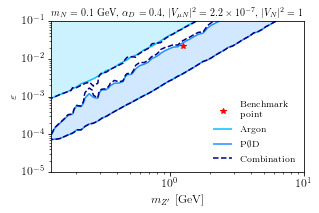

In [15]:
ax = set_canvas(f'{case_vars[0]}_{case_vars[1]}')
ax.set_ylim(1e-5, 1e-1)
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['Argon', r'P$\emptyset$D', 'Combination'],
                   # ['Combination'],
                   hierarchy=hierarchy,
                   D_or_M=D_or_M,
                   save_name='tpc_argon_vs_pod',
                   save_folder=save_folder,
                   ax=ax,
                   legend_loc='lower right',
                   colors=['deepskyblue', 'dodgerblue', 'navy'],
                   fill=[True, True, False],
                   linestyles=['-', '-', '--'],
                   levels=[likelihood_levels_2d[0.95], np.inf],
                   mode='contour',
                   interpolate=True)

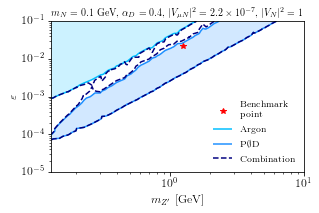

In [14]:
ax = set_canvas(f'{case_vars[0]}_{case_vars[1]}')
ax.set_ylim(1e-5, 1e-1)
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['Argon', r'P$\emptyset$D', 'Combination'],
                   # ['Combination'],
                   hierarchy=hierarchy,
                   D_or_M=D_or_M,
                   save_name='tpc_argon_vs_pod',
                   save_folder=save_folder,
                   ax=ax,
                   legend_loc='lower right',
                   colors=['deepskyblue', 'dodgerblue', 'navy'],
                   fill=[True, True, False],
                   linestyles=['-', '-', '--'],
                   levels=[likelihood_levels_2d[0.95], np.inf],
                   mode='tricontour',
                   interpolate=False)

TypeError: Input z must be 2D, not 1D

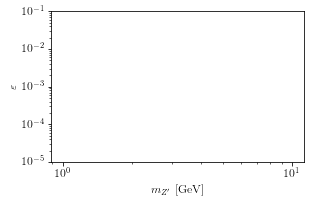

In [32]:
ax = set_canvas(f'{case_vars[0]}_{case_vars[1]}')
ax.set_ylim(1e-5, 1e-1)
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['Argon', r'P$\emptyset$D', 'Combination'],
                   hierarchy=hierarchy,
                   D_or_M=D_or_M,
                   save_name='tpc_argon_vs_pod',
                   save_folder=save_folder,
                   ax=ax,
                   legend_loc='lower right',
                   colors=['deepskyblue', 'dodgerblue', 'navy'],
                   fill=[True, True, False],
                   linestyles=['-', '-', '--'])

In [ ]:
ax = set_canvas(f'{case_vars[0]}_{case_vars[1]}')
ax.set_ylim(1e-5, 1e-1)
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['tpc', 'tpc_projection1', 'tpc_projection2', 'tpc_projection1_2'],
                   hierarchy=hierarchy,
                   D_or_M=D_or_M,
                   save_name='tpc_projections',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='lower right',
                   colors=['deepskyblue', 'green', 'violet', 'orange'],
                   linestyles=['-', '-', '-', '--'])

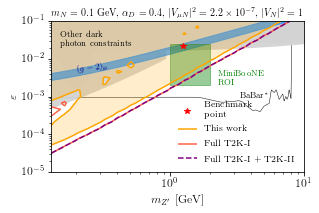

In [17]:
# for paper
ax = set_canvas(f'{case_vars[0]}_{case_vars[1]}')
mz_epsilon_heavy_plot(ax, retrieved['FHC']['pars']['m4'], retrieved['FHC']['pars']['mz'])
ax.set_ylim(1e-5, 1e-1)
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['This work', 'Full T2K-I', 'Full T2K-I + T2K-II'],
                   hierarchy=hierarchy,
                   save_name='final',
                   save_folder=save_folder,
                   ax=ax,
                   legend_loc='lower right',
                   colors=['orange', 'tomato', 'purple'],
                   fill=[True, False, False],
                   linestyles=['-', '-', '--'],
                   levels=[likelihood_levels_2d[0.9], np.inf]
                   )

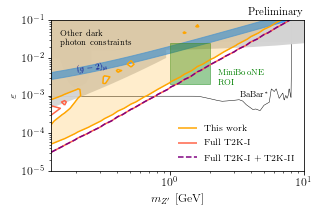

In [11]:
# for poster
ax = set_canvas(f'{case_vars[0]}_{case_vars[1]}')
mz_epsilon_heavy_plot(ax, retrieved['FHC']['pars']['m4'], retrieved['FHC']['pars']['mz'], poster_setting=True)
ax.set_ylim(1e-5, 1e-1)
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['This work', 'Full T2K-I', 'Full T2K-I + T2K-II'],
                   hierarchy=hierarchy,
                   D_or_M=D_or_M,
                   save_name='final_poster',
                   save_folder=save_folder,
                   ax=ax,
                   legend_loc='lower right',
                   colors=['orange', 'tomato', 'purple'],
                   fill=[True, False, False],
                   poster_setting=True,
                   linestyles=['-', '-', '--'])

# Heavy $m_N - |U_{\mu N}|^2$

In [12]:
case_vars = ['m4', 'Umu4_2']
retrieved = retrieve_full_analysis(case_vars, hierarchy)
likes, mus, sigma2s = compute_likes(retrieved, 
                                    my_exp_analyses, 
                                    hierarchy,
                                    D_or_M,
                                    analysis_names)

tpc_argon_only FHC
tpc_argon_only RHC
tpc_pod_only FHC
tpc_pod_only RHC
tpc FHC
tpc RHC
tpc_projection1 FHC
tpc_projection1 RHC
tpc_projection2 FHC
tpc_projection2 RHC


In [13]:
likes['Argon'] = likes['tpc_argon_only']
likes[r'P$\emptyset$D'] = likes['tpc_pod_only']
likes['Combination'] = likes['tpc']

likes['tpc_projection1_2'] = combine_likes([likes['tpc_projection1'], likes['tpc_projection2']])
likes['This work'] = likes['tpc']
likes['Full T2K-I'] = likes['tpc_projection1']
likes['Full T2K-I + T2K-II'] = likes['tpc_projection1_2']

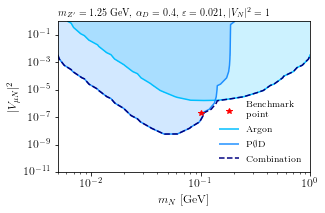

In [14]:
ax = set_canvas(f'{case_vars[0]}_{case_vars[1]}')
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['Argon', r'P$\emptyset$D', 'Combination'],
                   hierarchy=hierarchy,
                   D_or_M=D_or_M,
                   save_name='tpc_argon_vs_pod',
                   save_folder=save_folder,
                   ax=ax,
                   legend_loc='lower right',
                   colors=['deepskyblue', 'dodgerblue', 'navy'],
                   fill=[True, True, False],
                   linestyles=['-', '-', '--'])

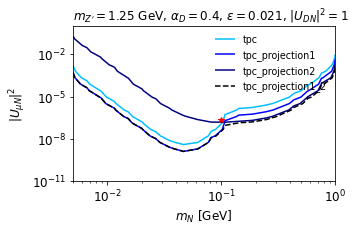

In [38]:
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['tpc', 'tpc_projection1', 'tpc_projection2', 'tpc_projection1_2'],
                   hierarchy=hierarchy,
                   D_or_M=D_or_M,
                   save_name='tpc_projections',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='upper right',
                   colors=['deepskyblue', 'blue', 'navy', 'black'],
                   linestyles=['-', '-', '-', '--'])

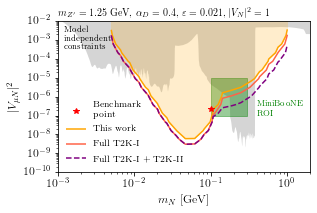

In [15]:
ax = set_canvas(f'{case_vars[0]}_{case_vars[1]}')
m4_Umu4_2_heavy_plot(ax, np.geomspace(1e-3, 2, 1000))
    
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['This work', 'Full T2K-I', 'Full T2K-I + T2K-II'],
                   hierarchy=hierarchy,
                   D_or_M=D_or_M,
                   save_name='final',
                   save_folder=save_folder,
                   ax=ax,
                   legend_loc='lower left',
                   colors=['orange', 'tomato', 'purple'],
                   fill=[True, False, False],
                   linestyles=['-', '-', '--'])

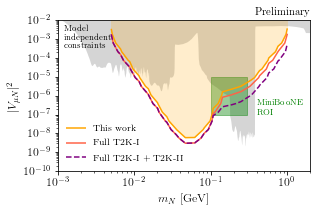

In [16]:
ax = set_canvas(f'{case_vars[0]}_{case_vars[1]}')
m4_Umu4_2_heavy_plot(ax, np.geomspace(1e-3, 2, 1000))

basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['This work', 'Full T2K-I', 'Full T2K-I + T2K-II'],
                   hierarchy=hierarchy,
                   D_or_M=D_or_M,
                   save_name='final_poster',
                   save_folder=save_folder,
                   ax=ax,
                   legend_loc='lower left',
                   colors=['orange', 'tomato', 'purple'],
                   fill=[True, False, False],
                   poster_setting=True,
                   linestyles=['-', '-', '--'])